In [2]:
import numpy as np
import gensim
import scipy 
from scipy import spatial


C:\Users\Linda\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


**Loading pre-trained common-space embeddings**

In [5]:
src_path = '~/desktop/embeddings/wiki.en.align.vec'
tgt_path = '~/desktop/embeddings/wiki.es.align.vec'
nmax = 100000  
src_model = gensim.models.KeyedVectors.load_word2vec_format(src_path,limit = nmax)
tgt_model = gensim.models.KeyedVectors.load_word2vec_format(tgt_path,limit = nmax)

**Removing Stop-Words(def + example)**

In [4]:
def stop_words(sentence,language):
    from nltk.corpus import stopwords 
    stop_words = set(stopwords.words(language)) 
    filtered_sentence = [w for w in sentence if not w in stop_words] 
    return filtered_sentence

In [5]:
import nltk

In [6]:
##EXAMPLE 
before = ['i','love','to','play','soccer','but','only','on','mondays','and','if','its','rainy']
print('before stopwords - ')
print(before)
print('\nafter stopwords -')
print(stop_words(before,'english'))


before stopwords - 
['i', 'love', 'to', 'play', 'soccer', 'but', 'only', 'on', 'mondays', 'and', 'if', 'its', 'rainy']

after stopwords -
['love', 'play', 'soccer', 'mondays', 'rainy']


 **Transforming Sentences To Embeddings**

In [9]:
def embedder(sentence,language):                                                                     
    first_word = 0 
    sentence = sentence.split(' ')
    sentence = stop_words(sentence,language)
    for word in sentence:                                 
        if (first_word == 0):
            if(language == 'english'):
                word_emb = src_model[word]
            else:
                word_emb = tgt_model[word]
            first_word = 1
        
        else:
            if(language == 'english'):
                word_emb = word_emb + src_model[word]   
            else:
                word_emb = word_emb + tgt_model[word]
    return word_emb
    

In [10]:
def transformer(sentence1,sentence2,stat):
    
    emb1 = embedder(sentence1,'english')
    emb2 = embedder(sentence2,'spanish')
    distance = spatial.distance.cosine(emb1,emb2)
    if(stat == 'similarity'):
        return(1-distance)
    elif(stat == 'distance'):
        return(distance) 

 **Visualization**

In [11]:
import matplotlib.pyplot as plt

In [12]:
sentences_en = ['the book is on the table','wikipedia is an encyclopedia','please allow me to introduce myself i am a man of wealth and taste']
sentences_es = ['el libro esta en la mesa','wikipedia es una enciclopedia','por favor deja que me presente soy un hombre de dinero y buen gusto']
compare = []
for i in range(0,len(sentences_en)):
    for j in range(0,len(sentences_en)):
        compare.append(transformer(sentences_en[i],sentences_es[j],'similarity'))
s1 = np.array(compare[:3])
s2 = np.array(compare[3:6])
s3 = np.array(compare[6:9])


In [13]:
def plotter(sentences_en,sentences_es,values , index):
    s_en = np.array(sentences_en)
    s_es = np.array(sentences_es)
    sizer = sentences_es
    k=0
    for item in sizer:
        if(len(item)>40):
            new = item[:40] +'...'
            sizer[k] = new
        k+=1
    fig,ax = plt.subplots()
    y_pos = np.arange(len(s_en))
    ax.barh(y_pos,values, align='center',color='blue', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(s_es,fontsize = 8)
    plt.title(sentences_en[index])
    plt.show()

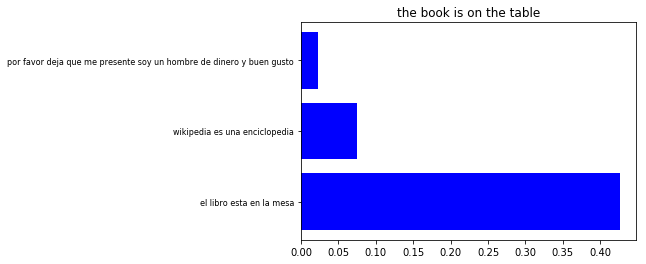

In [14]:
plotter(sentences_en,sentences_es,s1,0)

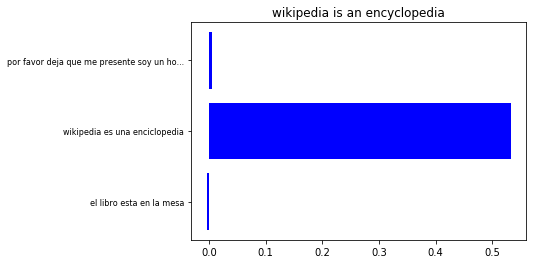

In [15]:
plotter(sentences_en,sentences_es,s2,1)

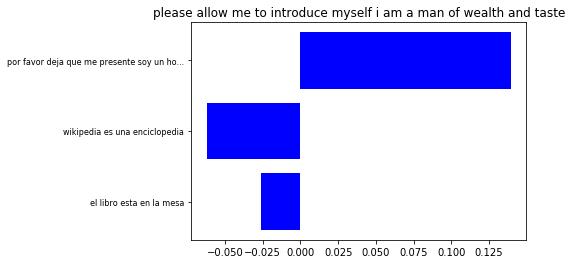

In [16]:
plotter(sentences_en,sentences_es,s3,2)